In [144]:
# Importing all required libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

# Disabling in-line warnings in the Notebook. 
warnings.filterwarnings('ignore')

In [2]:
spotify = pd.read_csv("top50.csv", encoding='cp1252')
spotify.head(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [3]:
spotify.drop("Unnamed: 0",axis=1, inplace=True)

In [4]:
spotify.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [5]:
spotify.tail()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
45,One Thing Right,Marshmello,brostep,88,62,66,-2,58,44,182,7,5,88
46,Te Robaré,Nicky Jam,latin,176,75,67,-4,8,80,202,24,6,88
47,Happier,Marshmello,brostep,100,79,69,-3,17,67,214,19,5,88
48,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
49,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track.Name        50 non-null     object
 1   Artist.Name       50 non-null     object
 2   Genre             50 non-null     object
 3   Beats.Per.Minute  50 non-null     int64 
 4   Energy            50 non-null     int64 
 5   Danceability      50 non-null     int64 
 6   Loudness..dB..    50 non-null     int64 
 7   Liveness          50 non-null     int64 
 8   Valence.          50 non-null     int64 
 9   Length.           50 non-null     int64 
 10  Acousticness..    50 non-null     int64 
 11  Speechiness.      50 non-null     int64 
 12  Popularity        50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 4.6+ KB


In [7]:
#Let's check the structure of our data and try to find visual infomration, firstly out of the categorical information, followed by the numerical fields (wherever applicable). 
#Later we may also do combinations of these features/column

In [8]:
spotify.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [9]:
spotify.isnull().sum()

Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [10]:
#What's the most energetic song?

spotify[spotify["Energy"] == spotify["Energy"].max()]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
34,Never Really Over,Katy Perry,dance pop,100,88,77,-5,32,39,224,19,6,89


In [11]:
#Which song has most danceability factor?

spotify[spotify["Danceability"] == spotify["Danceability"].max()]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
43,Talk,Khalid,pop,136,40,90,-9,6,35,198,5,13,84


In [12]:
#Which song is more loud, at least as per the Loudness Decibels?

spotify[spotify["Loudness..dB.."] == spotify["Loudness..dB.."].max()]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
13,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
45,One Thing Right,Marshmello,brostep,88,62,66,-2,58,44,182,7,5,88


In [13]:
#Which song is the most Lively?

spotify[spotify['Liveness'] == spotify['Liveness'].max()]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
45,One Thing Right,Marshmello,brostep,88,62,66,-2,58,44,182,7,5,88


In [14]:
# Which is the most lengthy song?

spotify[spotify['Length.'] == spotify["Length."].max()]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
22,No Me Conoce - Remix,Jhay Cortez,reggaeton flow,92,79,81,-4,9,58,309,14,7,83


In [15]:
# Finally, which is the most popular song?


spotify[spotify['Popularity'] == spotify["Popularity"].max()]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [16]:
#Let's check if there are any patterns in the Artist name.

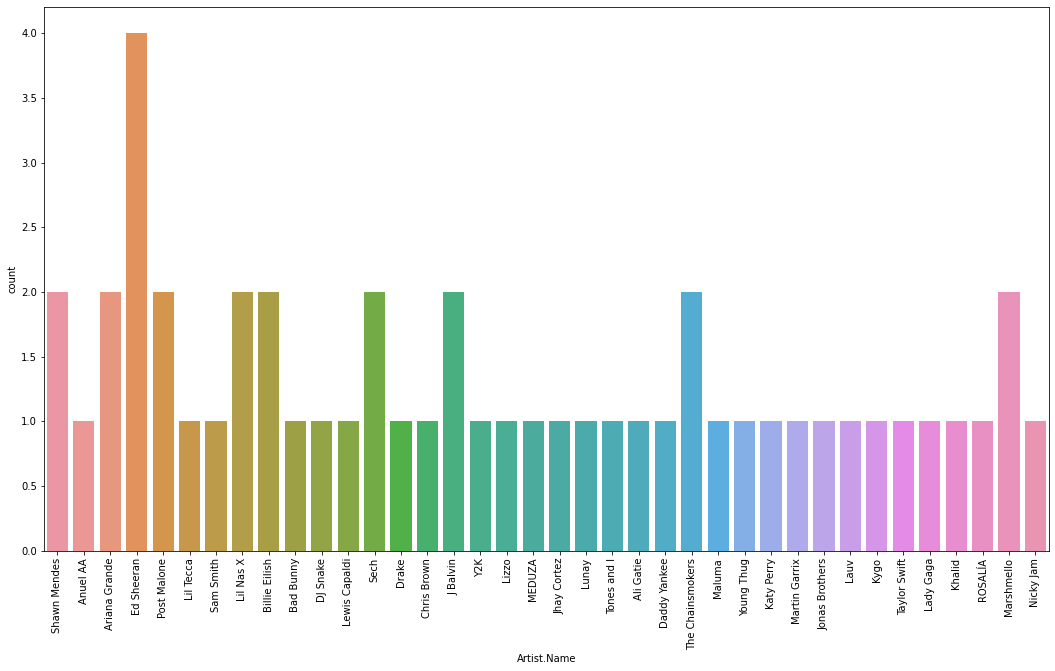

In [17]:
plt.figure(figsize=(18,10))
sns.countplot(x="Artist.Name", data=spotify)
plt.xticks(rotation=90);

In [18]:
# As we see no obvious patters in the data, let's check the Genre column of these songs.


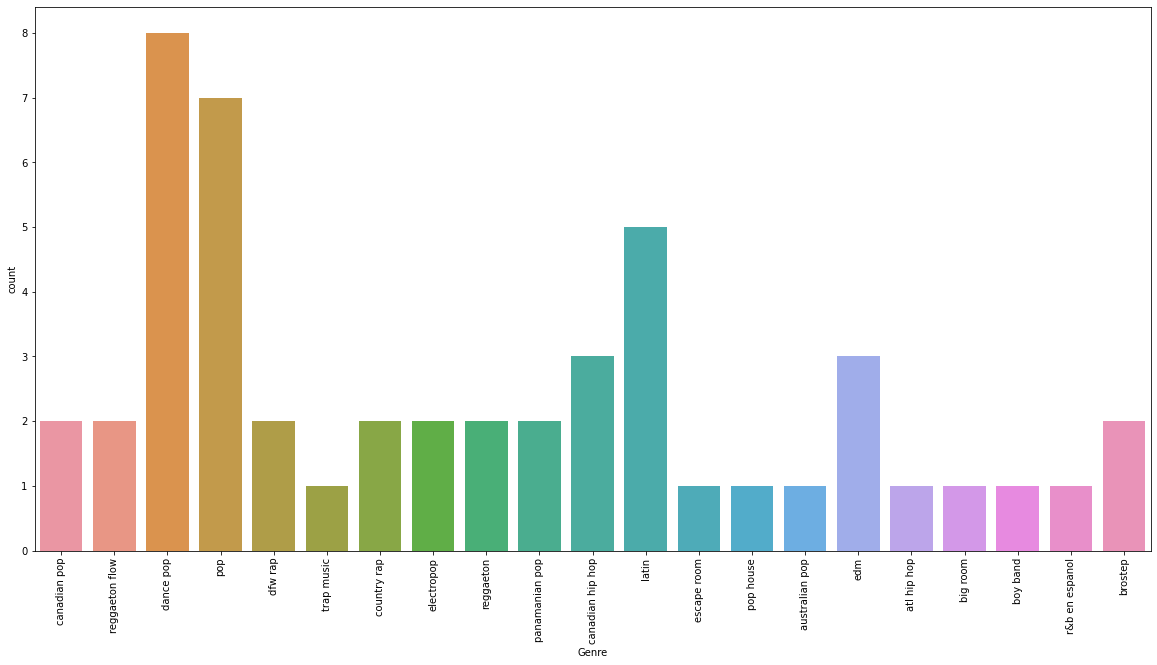

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(spotify['Genre'])
plt.xticks(rotation=90)
plt.show()

In [20]:
'''
Let's look at the Genre column once closely to see if we can find some meaningful information. 
From the earlier output of sample rows, we could see that keywords like "pop" 
which is a very casual nature of music is available in many Genres of many songs but is represented in different ways. 
We can perform some data cleaning there to get the actual Genre of the song, wherever applicable/possible.
'''

'\nLet\'s look at the Genre column once closely to see if we can find some meaningful information. \nFrom the earlier output of sample rows, we could see that keywords like "pop" \nwhich is a very casual nature of music is available in many Genres of many songs but is represented in different ways. \nWe can perform some data cleaning there to get the actual Genre of the song, wherever applicable/possible.\n'

In [21]:
spotify["Genre"].value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton flow      2
country rap         2
dfw rap             2
brostep             2
electropop          2
reggaeton           2
canadian pop        2
panamanian pop      2
big room            1
atl hip hop         1
australian pop      1
pop house           1
boy band            1
trap music          1
r&b en espanol      1
escape room         1
Name: Genre, dtype: int64

In [22]:
# Selecting rows where Genre contains the word "pop"
spotify[spotify['Genre'].str.contains('pop')]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
11,Loco Contigo (feat. J. Balvin & Tyga),DJ Snake,dance pop,96,71,82,-4,15,38,185,28,7,86
12,Someone You Loved,Lewis Capaldi,pop,110,41,50,-6,11,45,182,75,3,88
13,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
15,No Guidance (feat. Drake),Chris Brown,dance pop,93,45,70,-7,16,14,261,12,15,82


In [23]:
#Clearly out of 50 songs,23 belongs to Pop. Let's see what other Genres are available.

In [24]:
spotify[spotify['Genre'].str.contains('pop')].count()

Track.Name          23
Artist.Name         23
Genre               23
Beats.Per.Minute    23
Energy              23
Danceability        23
Loudness..dB..      23
Liveness            23
Valence.            23
Length.             23
Acousticness..      23
Speechiness.        23
Popularity          23
dtype: int64

In [25]:
# Checking rows with Genre other than Pop
spotify[~spotify['Genre'].str.contains('pop')]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
10,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
14,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
16,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
17,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,90,48,76,-6,7,91,158,56,5,91
18,Lalala,Y2K,canadian hip hop,130,39,84,-8,14,50,161,18,8,88
19,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91


In [26]:
#It seems we have some songs which are either Latin or Rap. let's check them one after another.

In [27]:
spotify[spotify['Genre'].str.contains('latin')].count()

Track.Name          5
Artist.Name         5
Genre               5
Beats.Per.Minute    5
Energy              5
Danceability        5
Loudness..dB..      5
Liveness            5
Valence.            5
Length.             5
Acousticness..      5
Speechiness.        5
Popularity          5
dtype: int64

In [28]:
spotify[spotify['Genre'].str.contains('rap')].count()

Track.Name          5
Artist.Name         5
Genre               5
Beats.Per.Minute    5
Energy              5
Danceability        5
Loudness..dB..      5
Liveness            5
Valence.            5
Length.             5
Acousticness..      5
Speechiness.        5
Popularity          5
dtype: int64

In [29]:
#We have 5 Latin and 5 Rap songs. Let's check for hip hop category as well.

In [30]:
spotify[spotify['Genre'].str.contains('hip')].count()

Track.Name          4
Artist.Name         4
Genre               4
Beats.Per.Minute    4
Energy              4
Danceability        4
Loudness..dB..      4
Liveness            4
Valence.            4
Length.             4
Acousticness..      4
Speechiness.        4
Popularity          4
dtype: int64

In [31]:
#Totally we have 4 songs only which are Hip Hop in Genre. Let's replace the Genre values in these columns as part of Data Cleaning.

In [32]:
# Imputing values for Pop Genre
spotify.loc[spotify['Genre'].str.contains('pop', case=False), 'Genre'] = 'Pop'

In [33]:
# Imputing values for Latin Genre
spotify.loc[spotify['Genre'].str.contains('latin', case=False), 'Genre'] = 'Latin'

In [34]:
# Imputing values for Rap Genre
spotify.loc[spotify['Genre'].str.contains('rap', case=False), 'Genre'] = 'Rap'

In [35]:
# Imputing values for Hip-Hop Genre
spotify.loc[spotify['Genre'].str.contains('hip', case=False), 'Genre'] = 'Hip-Hop'

In [36]:
spotify["Genre"].value_counts()

Pop               23
Latin              5
Rap                5
Hip-Hop            4
edm                3
reggaeton flow     2
brostep            2
reggaeton          2
escape room        1
r&b en espanol     1
big room           1
boy band           1
Name: Genre, dtype: int64

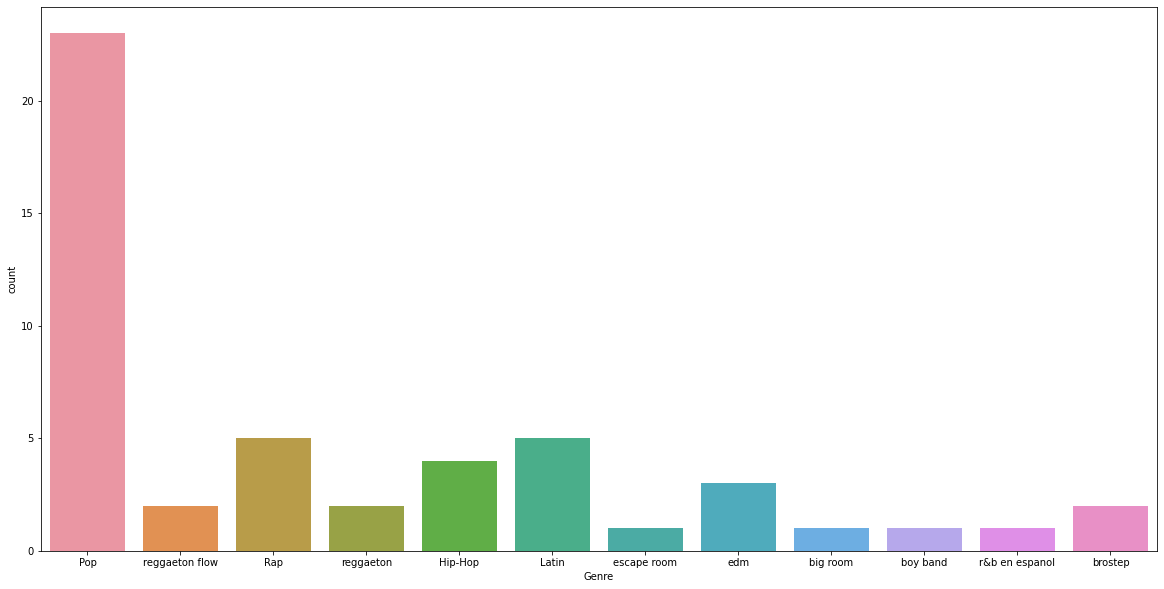

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x="Genre", data=spotify);

Overall now we have seen the patterns in Genre of our Data. It is clear that Pop Genre is the most liked songs in the Top 50 songs list.


In [38]:
spotify.head(10)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,Pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,Pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,Pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,Rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,Pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,Rap,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,Pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,Rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,Pop,135,43,70,-11,10,56,194,33,38,95


In [39]:
#length vs Beats
#

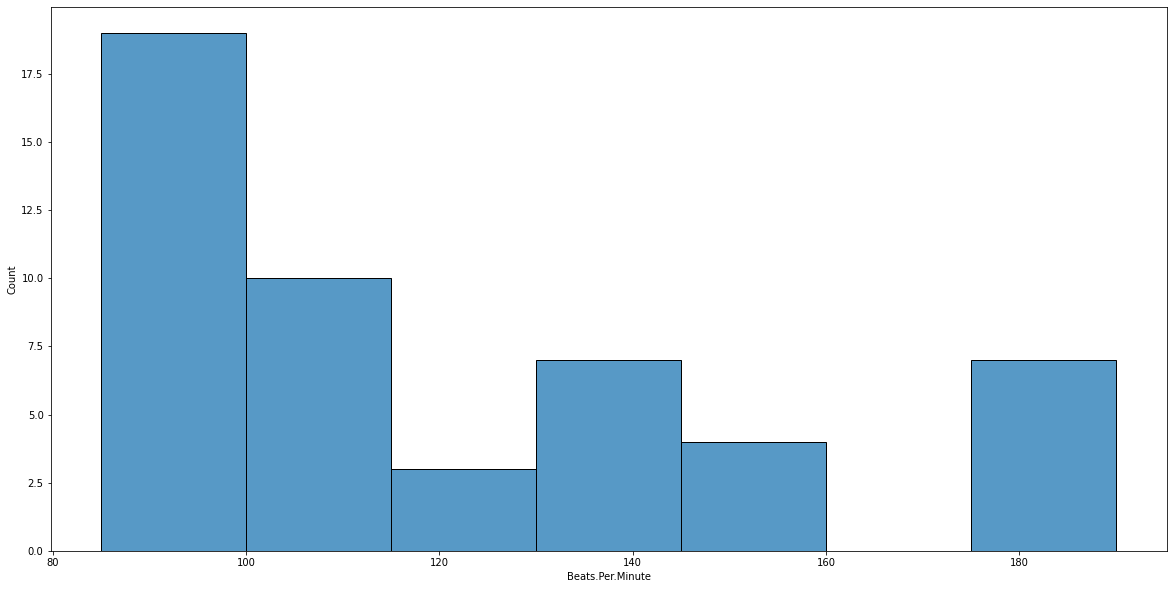

In [40]:
plt.figure(figsize=(20,10))
sns.histplot(x="Beats.Per.Minute", data=spotify);

We can observe that when energy level around 78-82 and Danceability around 65-70 most songs were played and next comes when the range is around 66-71 and 78-82

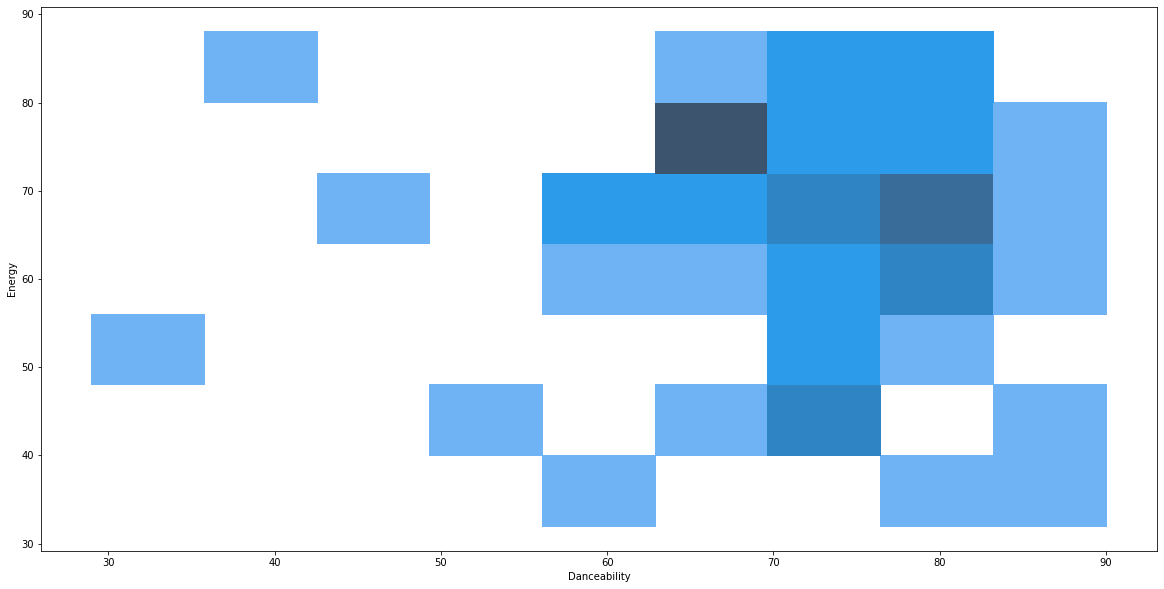

In [41]:
plt.figure(figsize=(20,10))
sns.histplot(x="Danceability", y="Energy", data=spotify);

In [42]:
#wordcloud based on music genre

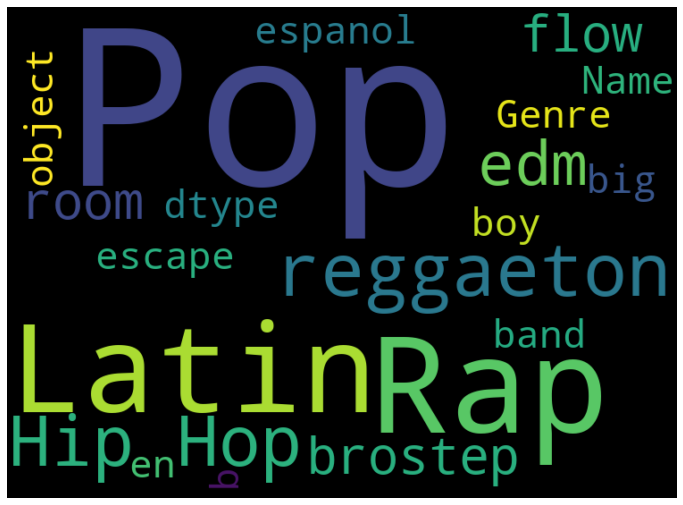

In [43]:
from wordcloud import WordCloud, STOPWORDS
# Create the wordcloud object
wordcloud = WordCloud(width=750, height=550, margin=3).generate(str(spotify.Genre))
# Display the generated image:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

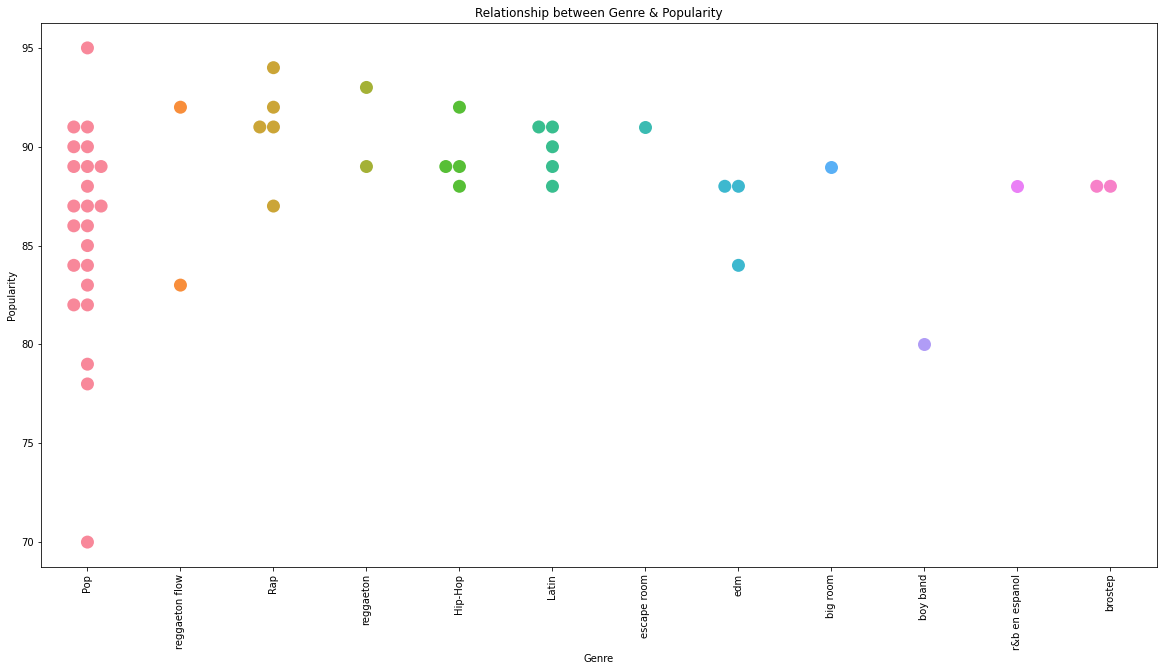

In [44]:
#Visualization of relationship between genre and popularity using SwarmPlot

plt.figure(figsize=(20,10))
swarmplot=sns.swarmplot(x="Genre",y="Popularity",data=spotify, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between Genre & Popularity");

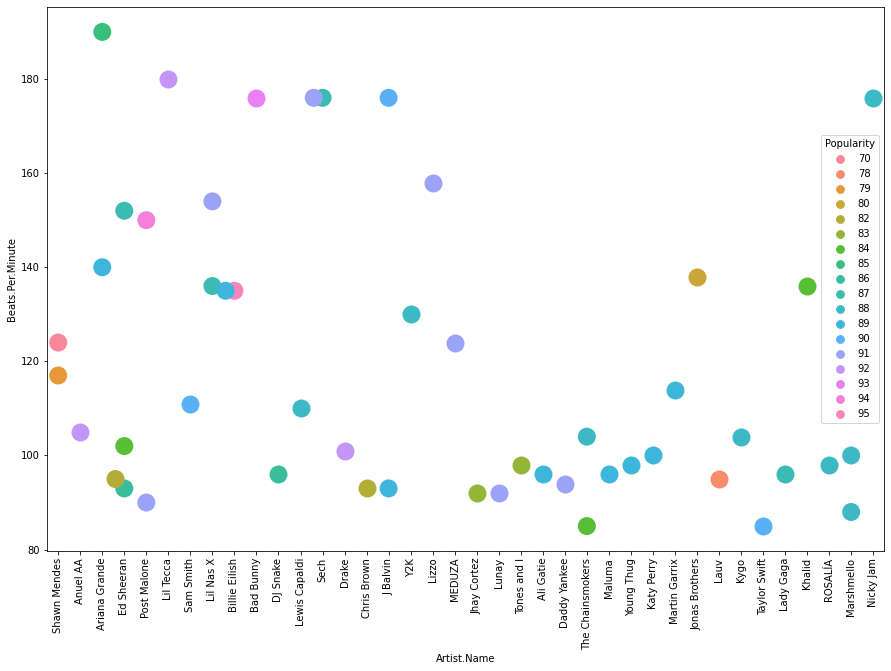

In [59]:
#Visualization the relationship between Beats Per Minute and artists based on Popularity

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.swarmplot(x="Artist.Name", y="Beats.Per.Minute",hue="Popularity", s=18,data=spotify);
plt.xticks(rotation=90);

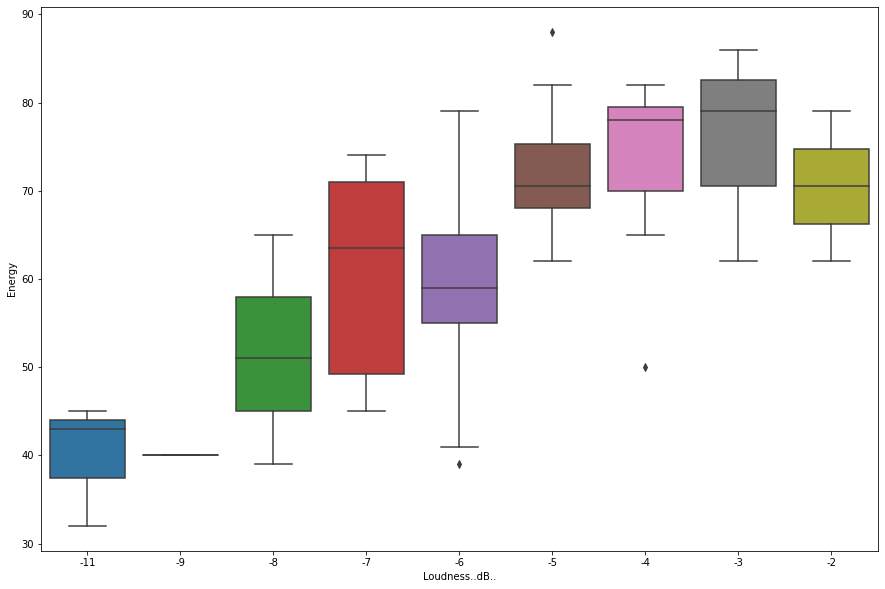

In [58]:
# Box plot of the relationship between Loudness..dB..and Energy
plt.figure(figsize=(15,10));
sns.boxplot(x = "Loudness..dB..", y = "Energy", data = spotify);

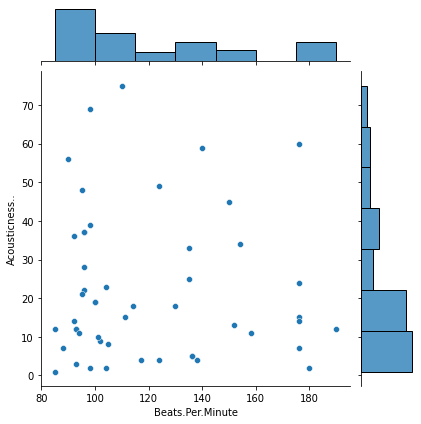

In [62]:
sns.jointplot(x="Beats.Per.Minute", y="Acousticness..", data=spotify);

In [65]:
#Similary, popularity and energy follow a positive correlance. As the energy increases, so does the popularity and vice versa.

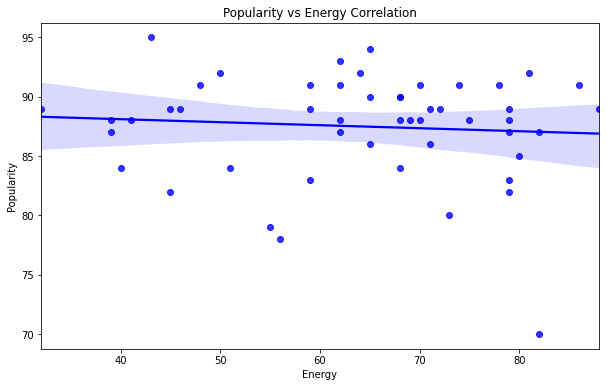

In [64]:
plt.figure(figsize=(10,6))
sns.regplot(data=spotify, y="Popularity", x="Energy", color="b").set(title="Popularity vs Energy Correlation");

In [83]:
spotify['Popularity'] = spotify['Popularity'].astype('int')
spotify.sort_values('Popularity', ascending=False).head(10)[['Popularity', 'Artist.Name']]

,Popularity,Artist.Name
9,95,Billie Eilish
4,94,Post Malone
10,93,Bad Bunny
14,92,Drake
1,92,Anuel AA
6,92,Lil Tecca
36,91,Sech
21,91,Lil Nas X
20,91,MEDUZA
19,91,Lizzo


<AxesSubplot:xlabel='Popularity', ylabel='Artist.Name'>

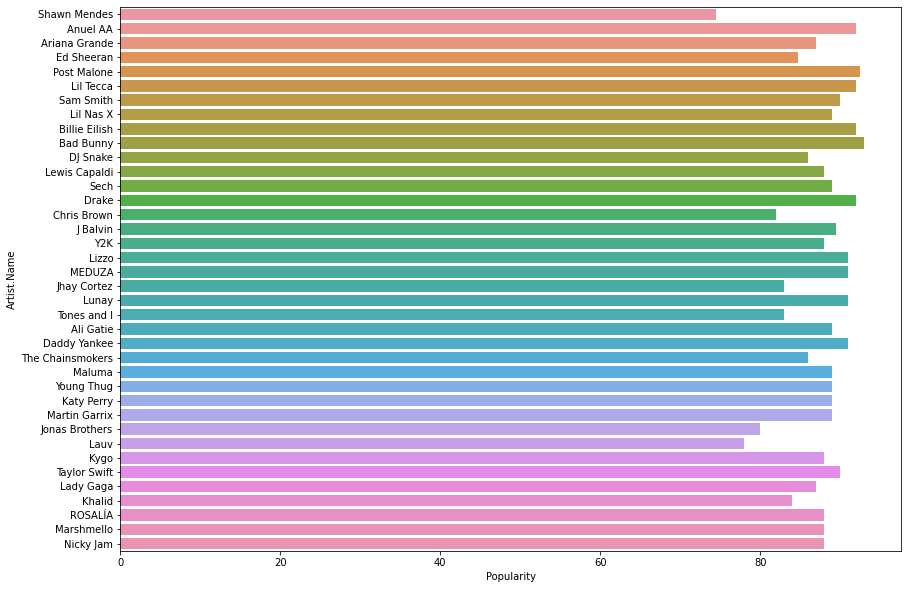

In [70]:
plt.figure(figsize=(14,10))
sns.barplot(y="Artist.Name", x="Popularity", data= spotify, ci=None)

In [84]:
spotify.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

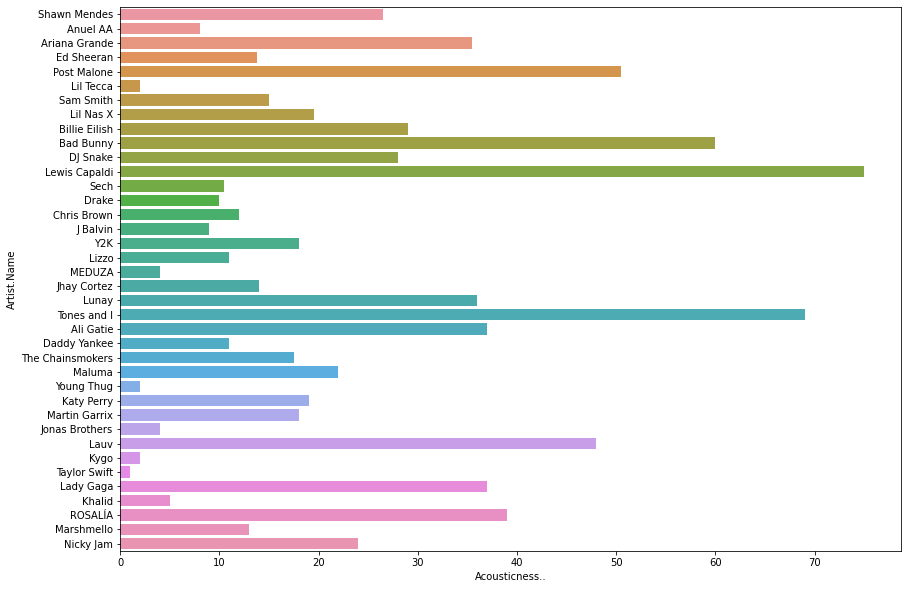

In [86]:
plt.figure(figsize=(14,10))
sns.barplot(y="Artist.Name", x="Acousticness..", data= spotify, ci=None);

In [149]:
spotify.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

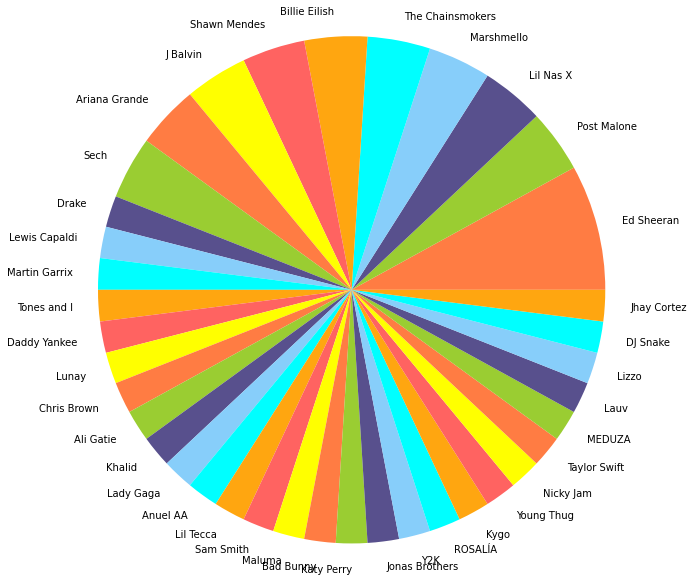

In [162]:
#Pie charts 
labels = spotify['Artist.Name'].value_counts().index
sizes = spotify['Artist.Name'].value_counts().values
colors = ['#ff7c43', 'yellowgreen', '#58508d', 'lightskyblue','cyan', '#ffa610', '#ff6361','yellow']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct=('%1.5f%%')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Loudness..dB..', ylabel='Speechiness.'>

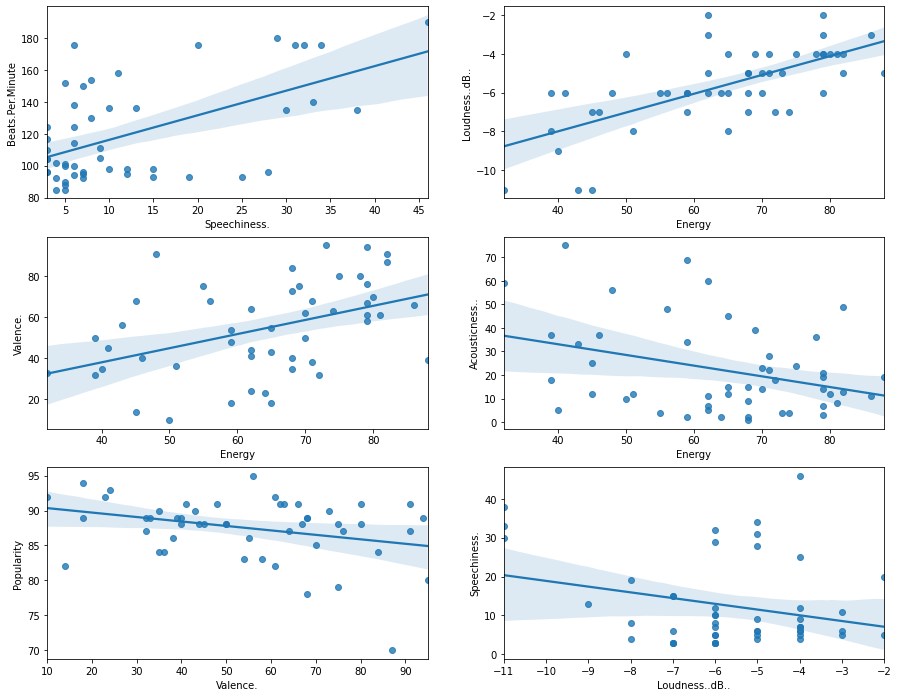

In [122]:
fig, axes = plt.subplots(3,2, figsize=(15,12))
sns.regplot(x='Speechiness.',y='Beats.Per.Minute',data=spotify, ax = axes[0,0])
sns.regplot(x='Energy',y='Loudness..dB..',data=spotify, ax = axes[0,1])
sns.regplot(x='Energy',y='Valence.',data=spotify, ax = axes[1,0])
sns.regplot(x='Energy',y='Acousticness..',data=spotify, ax = axes[1,1])
sns.regplot(x='Valence.',y='Popularity',data=spotify, ax=axes[2,0])
sns.regplot(x='Loudness..dB..',y='Speechiness.',data=spotify, ax = axes[2,1])

Some correlation found:

- Positive correlation
    1. Speechness and Beats per Minute
    2. Enery and Loudness
    3. Energy and Valence
- Negative correlation
    1. Energy and Acousticness
    2. Valence and Popularity
    3. Loudness and Speechness

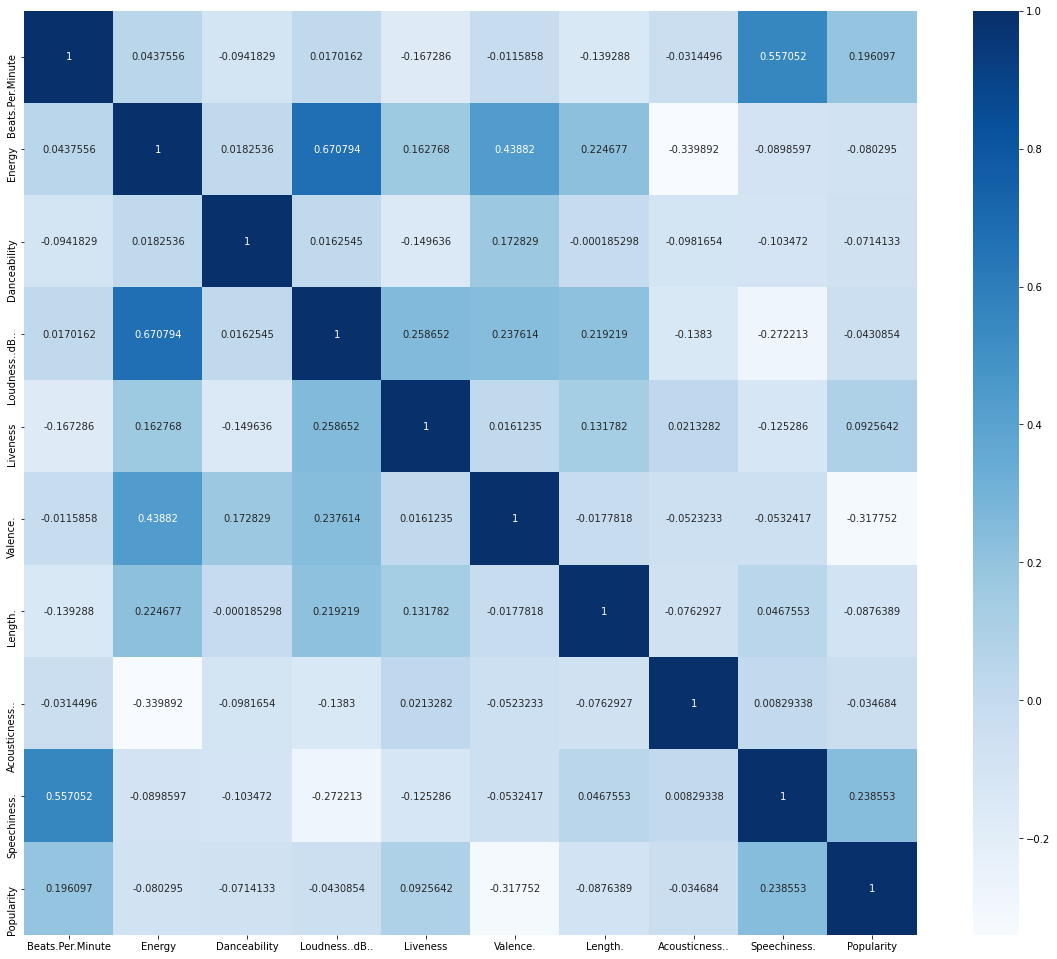

In [92]:
plt.figure(figsize=(20,17))
sns.heatmap(spotify.corr(),annot=True,cmap='Blues', fmt='g');

In [137]:
X = spotify.drop(['Popularity'], axis=1)
y = spotify['Popularity']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=0)

In [145]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Track.Name', 'Artist.Name', 'Genre']

In [169]:
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics' (c:\users\anura\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\__init__.py)